# Binary classification from 2 features

Classification using "raw" python or libraries to implement logistic regression.

The classification is on a single boundary defined by a continuous function and added white noise.

Linear regression is about finding the line, plan or hyper plan that has the best fit with the model. The predicted samples is a value.

Binary classification is about splitting the space into two halves with the best line/plan/hyper plan. The predicted sample is a probability that is transformed into a boolean using the threshold of 0.5.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from sklearn import metrics
from sklearn.linear_model import LogisticRegression as SkLinReg
import seaborn as sns

## Model

Quadratic function a boundary between positive and negative values

Adding some unknown as a Gaussian noise

The values of X are uniformly distributed and independent

In [2]:
# Two features, Gaussian noise
nFeatures = 2
def generateBatch(N):
    #
    xMin = 0
    xMax = 1
    b = 0.1
    std = 0.1
    #
    x = np.random.uniform(xMin, xMax, (N, nFeatures))
    # 4th degree relation to shape the boundary
    boundary = 2*(x[:,0]**4 + (x[:,0]-0.3)**3 + b)
    # Adding some gaussian noise
    labels = boundary + np.random.normal(0, std, N) > x[:,1]
    return (x, labels)

### Training data

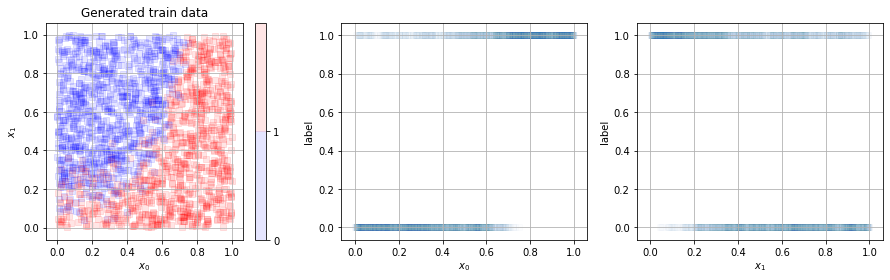

In [3]:
N = 2000
# x has 1 dim in R, label has 1 dim in B
xTrain, labelTrain = generateBatch(N)

colors = ['blue','red']

fig = plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(xTrain[:,0], xTrain[:,1], c=labelTrain, cmap=pltcolors.ListedColormap(colors), marker=',', alpha=0.1)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Generated train data')
plt.grid()
cb = plt.colorbar()
loc = np.arange(0,1,1/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels([0,1])
plt.subplot(1,3,2)
plt.scatter(xTrain[:,0], labelTrain, marker=',', alpha=0.01)
plt.xlabel('$x_0$')
plt.ylabel('label')
plt.grid()
plt.subplot(1,3,3)
plt.scatter(xTrain[:,1], labelTrain, marker=',', alpha=0.01)
plt.xlabel('$x_1$')
plt.ylabel('label')
plt.grid()

Bernouilli parameter of the distribution: 0.494


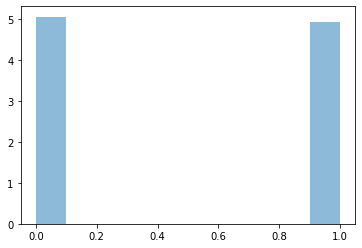

In [4]:
count, bins, ignored = plt.hist(labelTrain*1.0, 10, density=True, alpha=0.5)
p = np.mean(labelTrain)
print('Bernouilli parameter of the distribution:', p)

### Test data for verification of the model

In [5]:
xTest, labelTest = generateBatch(N)
testColors = ['navy', 'orangered']

### Logistic and log of Logistic functions

The Logistic function is used to transform a linear separation of the plan into a probability in the range \[0,1\]

\begin{align}
 logistic(x) = \frac{1}{1+e^{-x}}
\end{align}

In [6]:
def logistic(X):
    return (1+(np.exp(-(X))))**-1

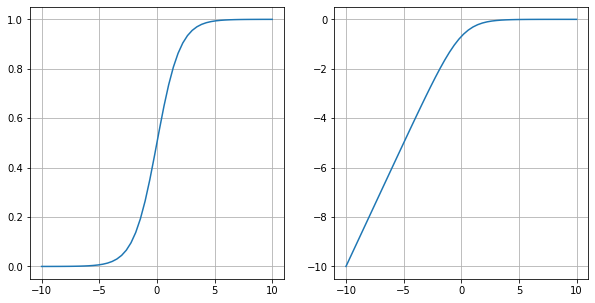

In [7]:
xx = np.linspace(-10, 10)
xlogistic = logistic(xx)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(xx, xlogistic)
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(xx, np.log(xlogistic))
plt.grid()

# Logistic regression

$$y \in \left\{ 0, 1 \right\}$$

$$\begin{align}
P (Y=1 \mid x) & = \frac{1}{1+e^{-f(x)}} \\
P (Y=0 \mid x) & = 1 - \frac{1}{1+e^{-f_\theta(x)}} \\
f_\theta(x) & = b + w x 
\end{align}$$

Let's define $\theta=\{b, w\}$

We are looking for the value of $\theta$ that maximizes the likelyhood:
$$\begin{align}
\hat{\theta} & = \underset{\theta \in \mathbb{R}}{argmax} \prod_{i=0}^N{P(y_i \mid  x_i, \theta)} \\
& = \underset{\theta \in \mathbb{R}}{argmax} \sum_{i=0}^N{log \bigl(p(y_i \mid x_i, \theta)\bigr)}  \\
& = \underset{\theta \in \mathbb{R}}{argmax} \sum_{i=0}^N{log \biggl(\bigl(\frac{1}{1+e^{-f_\theta(x_i)}}\bigr)^{y_i}\bigl(1-\frac{1}{1+e^{-f_\theta(x_i)}}\bigr)^{1-y_i}\biggr)}  \\
& = \underset{\theta \in \mathbb{R}}{argmax} \sum_{i=0}^N{log \biggl(y_i * \bigl(\frac{1}{1+e^{-f_\theta(x_i)}}\bigr) + \bigl(1-y_i\bigr) * \bigl(1-\frac{1}{1+e^{-f_\theta(x_i)}}\bigr) \biggr)}  \\
\end{align}$$

Using the fact that $y_i$ is either 0 or 1

If using an iterative algorithm, the cost function to minimize is taken as the negative maximum log likelyhood:
$$
J_\theta = - \sum_{i=0}^N{log \left(y_i * \left(\frac{1}{1 + e^{-f_\theta(x_i)}}\right) + \left(1 -y_i\right) * \left(1 - \frac{1}{1+e^{-f_\theta(x_i)}}\right) \right)} 
$$

Reference:
- https://en.wikipedia.org/wiki/Logistic_regression


## Helpers

In [8]:
def plotTestResult(xTest, labelTest, yEst, labelEst):
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    im0 = axes[0].scatter(xTest[:,0], xTest[:,1], c=labelEst, cmap=pltcolors.ListedColormap(testColors), marker='x', alpha=0.2);
    axes[0].set_xlabel('$x_0$')
    axes[0].set_ylabel('$x_1$')
    axes[0].grid()
    axes[0].set_title('Estimated')
    cb = plt.colorbar(im0, ax=axes[0])
    loc = np.arange(0, 1, 1./len(testColors))
    cb.set_ticks(loc)
    cb.set_ticklabels([0,1]);
    
    axes[1].hist(yEst, 10, density=True, alpha=0.5)
    axes[1].set_title('Bernouilli parameter =' + str(np.mean(labelEst)))
    
    im2 = axes[2].scatter(xTest[:,0], xTest[:,1], c=labelTest, cmap=pltcolors.ListedColormap(colors), marker='x', alpha=0.2);
    axes[2].set_xlabel('$x_0$')
    axes[2].set_ylabel('$x_1$')
    axes[2].grid()
    axes[2].set_title('Generator')
    cb = plt.colorbar(im2, ax=axes[2])
    loc = np.arange(0, 1, 1./len(colors))
    cb.set_ticks(loc)
    cb.set_ticklabels([0,1])
    return axes
    
# ROC curve, obtained varying the decision threshold to predict a True given a probability
def plotRocCurve(labelTest, yEstTrue):
    logit_roc_auc = metrics.roc_auc_score(labelTest, yEstTrue)
    fpr, tpr, thresholds = metrics.roc_curve(labelTest, yEstTrue)
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right");
    
def plotHeatMap(X, classes, title=None, fmt='.2g', ax=None, xlabel=None, ylabel=None):
    """ Fix heatmap plot from Seaborn with pyplot 3.1.0, 3.1.1
        https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
    """
    ax = sns.heatmap(X, xticklabels=classes, yticklabels=classes, annot=True, fmt=fmt, cmap=plt.cm.Blues, ax=ax) #notation: "annot" not "annote"
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    if title:
        ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
        
def plotConfusionMatrix(yTrue, yEst, classes, title=None, fmt='.2g', ax=None):
    plotHeatMap(metrics.confusion_matrix(yTrue, yEst), classes, title, fmt, ax, \
                xlabel='Estimations', ylabel='True values');

## Homemade fitting of $b$ and then $w$


Suboptimal fitting:
- Taking some assumption on $w$ to fit $b$ as $\hat{b}$
- and then fitting $w$ with the $\hat{b}$ estimate using a simple grid search

Estimated b = -0.408163265306122


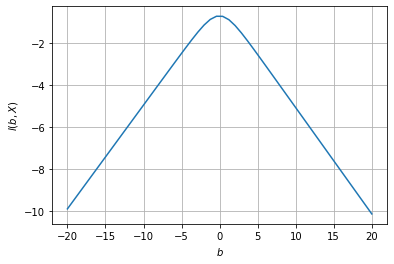

In [9]:
bs = np.linspace(-20, 20)
ws = np.array([0,0]);
px = np.zeros(len(bs))
for i in range(len(bs)):
    fx = logistic(bs[i] + np.matmul(xTrain, ws))
    px[i] = 1/N * np.sum(np.log(labelTrain * fx + (1 - labelTrain)*(1 - fx)))
plt.plot(bs, px);
plt.xlabel('$b$')
plt.ylabel('$l(b, X)$')
plt.grid()
bHat = bs[np.argmax(px)]
print('Estimated b =', bHat) 

### Fitting $w$ with a simple grid search 

In [10]:
w0 = np.linspace(-20, 20)
w1 = np.linspace(-20, 20)
px = np.zeros((len(w0), len(w1)))
for i in range(len(w0)):
    for j in range(len(w1)):
        fx = logistic(bHat + np.matmul(xTrain, np.array([w0[i], w1[j]])))
        px[i, j] = 1/N * np.sum(np.log(np.multiply(labelTrain, fx) + np.multiply((1-labelTrain),(1-fx))))
m = np.argmax(px)
wHat = np.array([w0[m//len(w0)], w1[m%len(w0)]])
print('Estimated w =', wHat)

Estimated w = [ 11.83673469 -10.20408163]


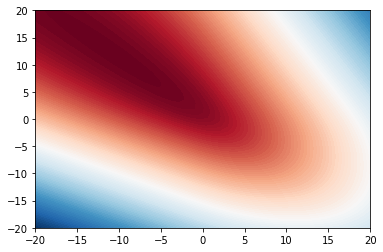

In [11]:
plt.contourf(w0, w1, px, levels=128, cmap="RdBu_r");

## Testing of model 0 (homemade)

In [12]:
yEst0 = logistic(bHat + np.matmul(xTest, wHat))
labelEst0 = yEst0 > 0.5

Classes centroids (center of gravity)

In [13]:
xBarEst = np.array([np.mean(xTest[labelEst0 == c], axis = 0) for c in [0, 1]])
xBarGen = np.array([np.mean(xTest[labelTest == c], axis = 0) for c in [0, 1]])

Classes separation frontiere in the 2D plan

In [14]:
xx0 = np.linspace(0, 1)
xx1 = -(bHat + wHat[0] * xx0) / wHat[1]

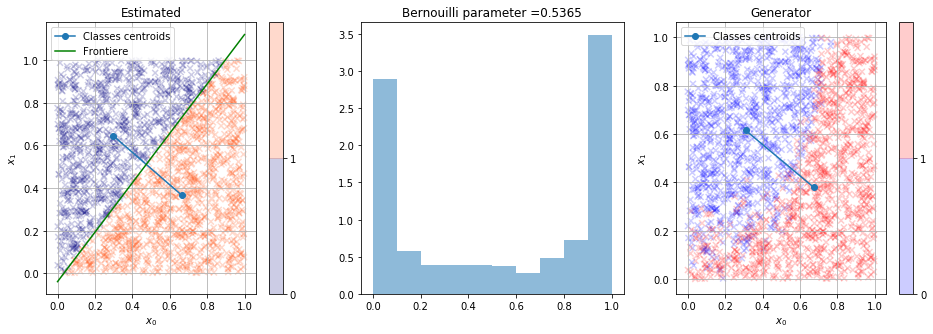

In [15]:
axes = plotTestResult(xTest, labelTest, yEst0, labelEst0)
axes[0].plot(xBarEst[:,0], xBarEst[:,1], marker='o', label='Classes centroids')
axes[0].plot(xx0, xx1, color='g', label='Frontiere');
axes[0].legend(loc='upper left')
axes[2].plot(xBarGen[:,0], xBarGen[:,1], marker='o', label='Classes centroids')
axes[2].legend(loc='upper left');

The separation of the space by a straight line is a mere approximation of the polynomial function of the generator. However, performance is not that bad as shown below.

In [16]:
accuracy0 = np.sum(labelTest == labelEst0)/N
print('Accuracy =', accuracy0)

Accuracy = 0.8805


### Precision 
$P(y = 1 \mid \hat{y} = 1)$

In [17]:
print('Precision =', np.sum(labelTest[labelEst0 == 1])/np.sum(labelEst0))

Precision = 0.8620689655172413


### Recall
$P(\hat{y} = 1 \mid y = 1)$

In [18]:
print('Recall =', np.sum(labelTest[labelEst0 == 1])/np.sum(labelTest))

Recall = 0.9104330708661418


### Confusion matrix

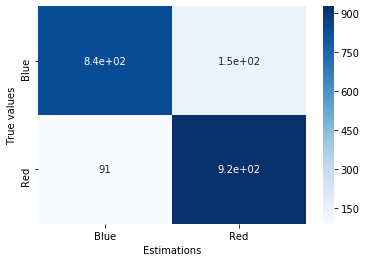

In [19]:
plotConfusionMatrix(labelTest, labelEst0, np.array(['Blue', 'Red']));

In [20]:
print(metrics.classification_report(labelTest, labelEst0))

              precision    recall  f1-score   support

       False       0.90      0.85      0.87       984
        True       0.86      0.91      0.89      1016

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



### ROC Curve

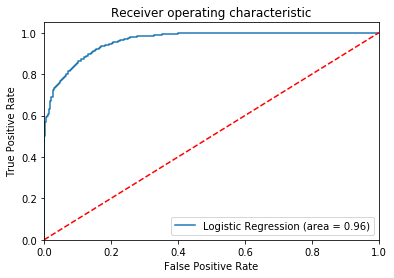

In [21]:
plotRocCurve(labelTest, yEst0)

# Using SciKit Learn's linear regression

References:
- SciKit documentation
- https://www.geeksforgeeks.org/ml-logistic-regression-using-python/

In [22]:
model1 = SkLinReg(solver='lbfgs')
model1.fit(xTrain, labelTrain)
print('Y = logistic({1} + X * {0})'.format(model1.coef_, model1.intercept_[0]))

Y = logistic(-1.1819649092679545 + X * [[ 9.15042414 -6.74323194]])


In [23]:
labelEst1 = model1.predict(xTest)
print('Mean accuracy =', model1.score(xTest, labelTest))

Mean accuracy = 0.8935


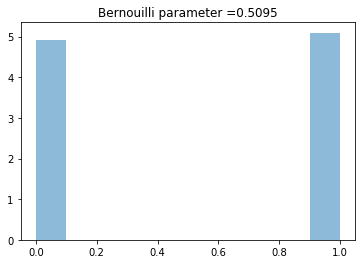

In [24]:
plt.hist(labelEst1*1.0, 10, density=True, alpha=0.5)
plt.title('Bernouilli parameter =' + str(np.mean(labelEst1)));

### Confusion matrix (plot)

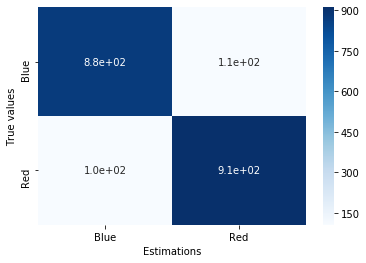

In [25]:
plotConfusionMatrix(labelTest, labelEst1, np.array(['Blue', 'Red']));

### Classification report

In [26]:
print(metrics.classification_report(labelTest, labelEst1))

              precision    recall  f1-score   support

       False       0.89      0.89      0.89       984
        True       0.89      0.90      0.90      1016

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000



References :
- https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.get_params

### ROC curve

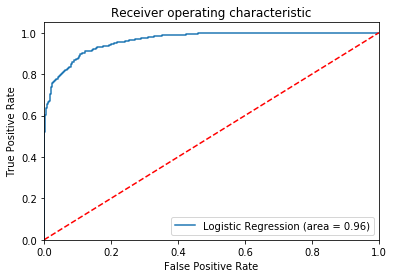

In [27]:
yEst1True = model1.predict_proba(xTest)[:,1]
plotRocCurve(labelTest, yEst1True)

# Using SciKitLearn's gradient descent classifier

References:
- https://scikit-learn.org/stable/modules/sgd.html#classification

In [28]:
from sklearn.linear_model import SGDClassifier as skSGDClassifier

model2 = skSGDClassifier(alpha=0.0001, average=False, class_weight=None,
           early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
           l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
           n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
           random_state=None, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Notes:
- Regularizer is called 'penalty' and parameterized by 'alpha' (and 'l1_ratio')
- Early stopping is available and parameterized by 'early_stopping', 'max_iter', 'tol' and 'n_iter_no_change'
- Shuffling between epochs enabled by 'shuffle'

In [29]:
model2.fit(xTrain, labelTrain);
print('Y = logistic({1} + X * {0})'.format(model2.coef_, model2.intercept_[0]))

Y = logistic(-1.399356875305446 + X * [[ 12.52565336 -10.43100322]])


In [30]:
labelEst2 = model2.predict(xTest)
print('Mean accuracy =', model2.score(xTest, labelTest))

Mean accuracy = 0.878


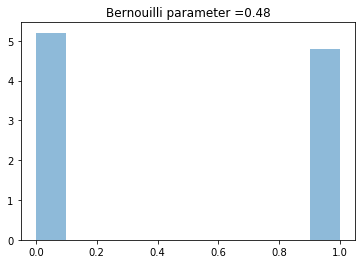

In [31]:
plt.hist(labelEst2*1.0, 10, density=True, alpha=0.5)
plt.title('Bernouilli parameter =' + str(np.mean(labelEst2)));

### Confusion matrix (plot)

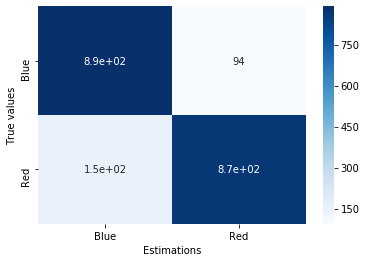

In [32]:
plotConfusionMatrix(labelTest, labelEst2, np.array(['Blue', 'Red']));

### Classification report

In [33]:
print(metrics.classification_report(labelTest, labelEst2))

              precision    recall  f1-score   support

       False       0.86      0.90      0.88       984
        True       0.90      0.85      0.88      1016

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



# Where to go from here ?

- Other linear implementations and simple neural nets using TensorFlow ([HTML](ClassificationContinuous2Features-TensorFlow.html) / [Jupyter](ClassificationContinuous2Features-TensorFlow.ipynb)), using Keras ([HTML](ClassificationContinuous2Features-Keras.html) / [Jupyter](ClassificationContinuous2Features-Keras.ipynb)) or the K Nearest Neighbors classifier ([HTML](ClassificationContinuous2Features-KNN.html) / [Jupyter](ClassificationContinuous2Features-KNN.ipynb))

- Non linear problem solving with Support Vector Machine (SVM) ([HTML](ClassificationSVM.html) / [Jupyter](ClassificationSVM.ipynb))

- More complex multi-class models on the Czech and Norways flags using Keras ([HTML](ClassificationMulti2Features-Keras.html) / [Jupter](ClassificationMulti2Features-Keras.ipynb)), showing one of the main motivations to neural networks.

- Compare with the two feature linear regression using simple algorithms ([HTML](../linear/LinearRegressionBivariate.html) / [Jupyter](LinearRegressionBivariate.ipynb])), or using Keras ([HTML](LinearRegressionBivariate-Keras.html) / [Jupyter](LinearRegressionUnivariate-Keras.ipynb))